<a href="https://colab.research.google.com/github/uguratli/mat555hw/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import axis
import numpy as np
import urllib.request
import json
import pandas as pd

1)Riemann sum of a function.

In [ ]:
def fn(x):  ##our function
    return x**2 +1
def RSumm(a,b,N,Fn):
    N=int(N) ## number of subintervals.
    delta=(a-b)/int(N) ##calculating dx, subinterval width
    x=b-delta
    sum=0
    while x<a:
        x=x+delta 
        sum=sum+Fn(x)*delta. ##area of  rectangle under the curve, sum of areas of rectangels will give the result.
    return sum

In [ ]:
print(RSumm(4,10,1000,fn))


318.35403600001064


2)Random sample on unit circle.

In [ ]:
def testunitcircle(M):  ## just checking
    return M[:,0]**2 +M[:,1]**2
def unitcircle(N):
    ##To find points on unit circle, we can think their positions depends only the angle.
    ##Like, x=R*cos(a), here R is a constant '1'.
    points=np.empty([N,0])
    #since rand() gives values between [0,1], to cover whole circle we have to expand it.
    theta=np.random.rand(N)*2*np.pi ## if we multiply the rand() function with 2pi, it gives values between [0,2pi].
    ##and whole circle covered.
    theta=np.reshape(theta,(N,1))
    ##we have R(theta), now turn back to x y coordinates.
    points=np.append(points,np.cos(theta),axis=1)###X 
    points=np.append(points,np.sin(theta),axis=1)###Y
    return points

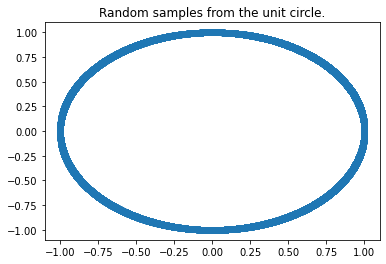

In [ ]:
N=10000
M=unitcircle(N) 
#print(M) 
#print(testunitcircle(M))
plt.scatter(M[:,0],M[:,1])
plt.title('Random samples from the unit circle.')
plt.show()

3)Random samples on unit sphere.

In [ ]:
def testunitsphere(M):
    return M[:,0]**2+M[:,1]**2+M[:,2]**2
def unitsphere(N):
    ##The way is almost same with unit circle, now we need 2 angles to cover sphere
    points=np.empty((N,0))
    ##1st angle goes [0,2pi]
    theta=np.random.rand(N)*2*np.pi
    theta=np.reshape(theta,(N,1))
    ##2nd angle goes [0,pi]
    phi=np.random.rand(N)*np.pi
    phi=np.reshape(phi,(N,1))
    ##We have points, now time to calculate their positions in x-y-z
    points=np.append(points,np.cos(theta)*np.sin(phi),axis=1)
    points=np.append(points,np.sin(theta)*np.sin(phi),axis=1)
    points=np.append(points,np.cos(phi),axis=1)
    return points

[[-0.67391177  0.69346586 -0.25484903]
 [ 0.19049671 -0.04027075 -0.98086149]
 [-0.17280409 -0.87800709  0.44636566]
 ...
 [-0.04467136  0.36912168  0.92830688]
 [ 0.40193291 -0.91313899  0.06802299]
 [ 0.62994685  0.03957812  0.77562912]]


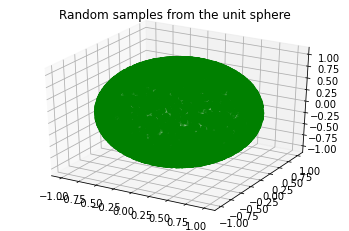

In [ ]:
M=unitsphere(N)
print(M)
#print(testunitsphere(M))
ax = plt.axes(projection ="3d")
ax.scatter3D(M[:,0], M[:,1], M[:,2], color = "green")
plt.title('Random samples from the unit sphere')
plt.show()

4) Random sampling on n-sphere 

In [ ]:
def testnsphere(M):##checks sum of square of all elements in row.
  test=np.zeros((len(M[:,0]),1))
  for i in range(len(M[:,0])):
    test[i]=sum(M[i,:]**2)
  return test
def nsphere(N,n):
  ##if we generate standard normally disturbed numbers between -1,1 and think them as vector,
  ## if normalize the vectors, we can obtain points on n-sphere. 
  M=np.random.uniform(-1,1,(N,n)) ##generates  matrix of N x n with elements -1,1
  for i in range(len(M[:,0])): ##calculates norm of every row and divide the row with its norm.
    norm=sum(M[i,:]**2)**(1/2)
    M[i,:]=M[i,:]/norm
  return M
N=50
matris=nsphere(N,6)
print(matris)
print(testnsphere(matris))

5)Location of bus stops in İstanbul

# Yeni Bölüm